In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e4/sample_submission.csv
/kaggle/input/playground-series-s4e4/train.csv
/kaggle/input/playground-series-s4e4/test.csv


In [3]:
train_df = pd.read_csv('/kaggle/input/playground-series-s4e4/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s4e4/test.csv')

In [4]:
train_df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [6]:
train_df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

# Data Analysis

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wn
wn.filterwarnings('ignore')

In [8]:
train_df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [9]:
num_cols = train_df.dtypes[train_df.dtypes==float].keys().tolist()

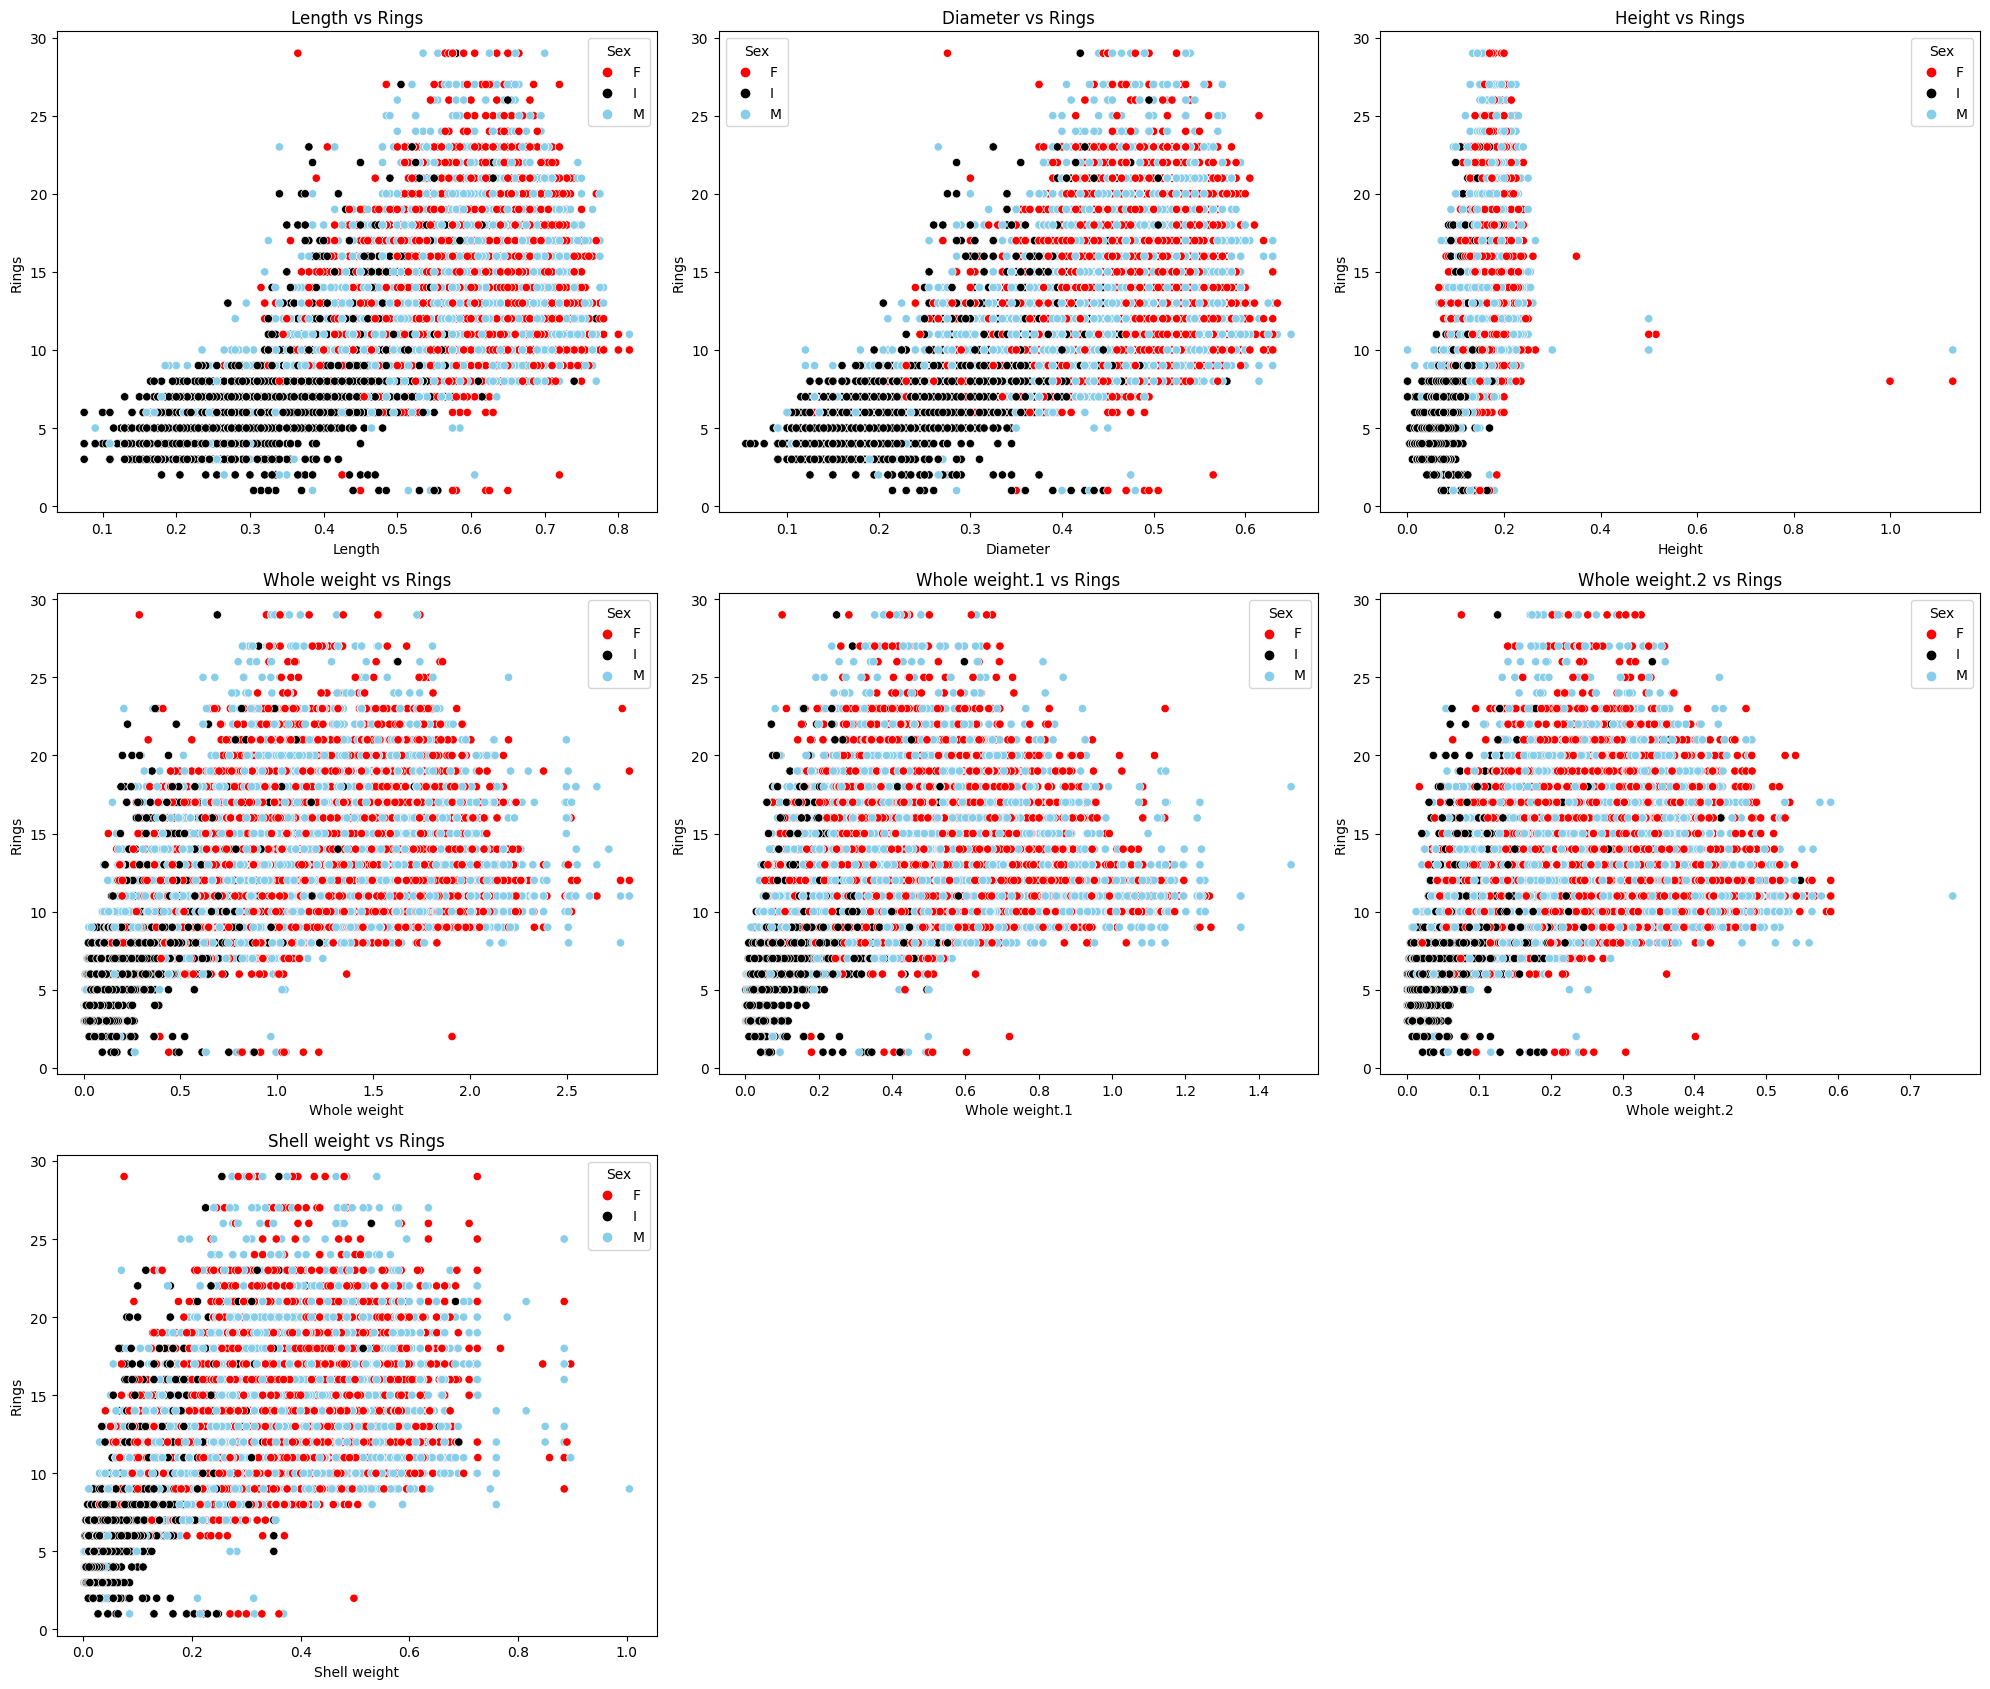

In [10]:
plt.figure(
    figsize=(20,17)
)
for i,cols in enumerate(num_cols):
    plt.subplot(3,3,(i+1))
    sns.scatterplot(
        data = train_df,
        x = cols,
        y = 'Rings',
        hue='Sex',
        palette=['Red','Black','skyblue']
    )
    plt.title(f'{cols} vs Rings')
plt.tight_layout()
plt.show()

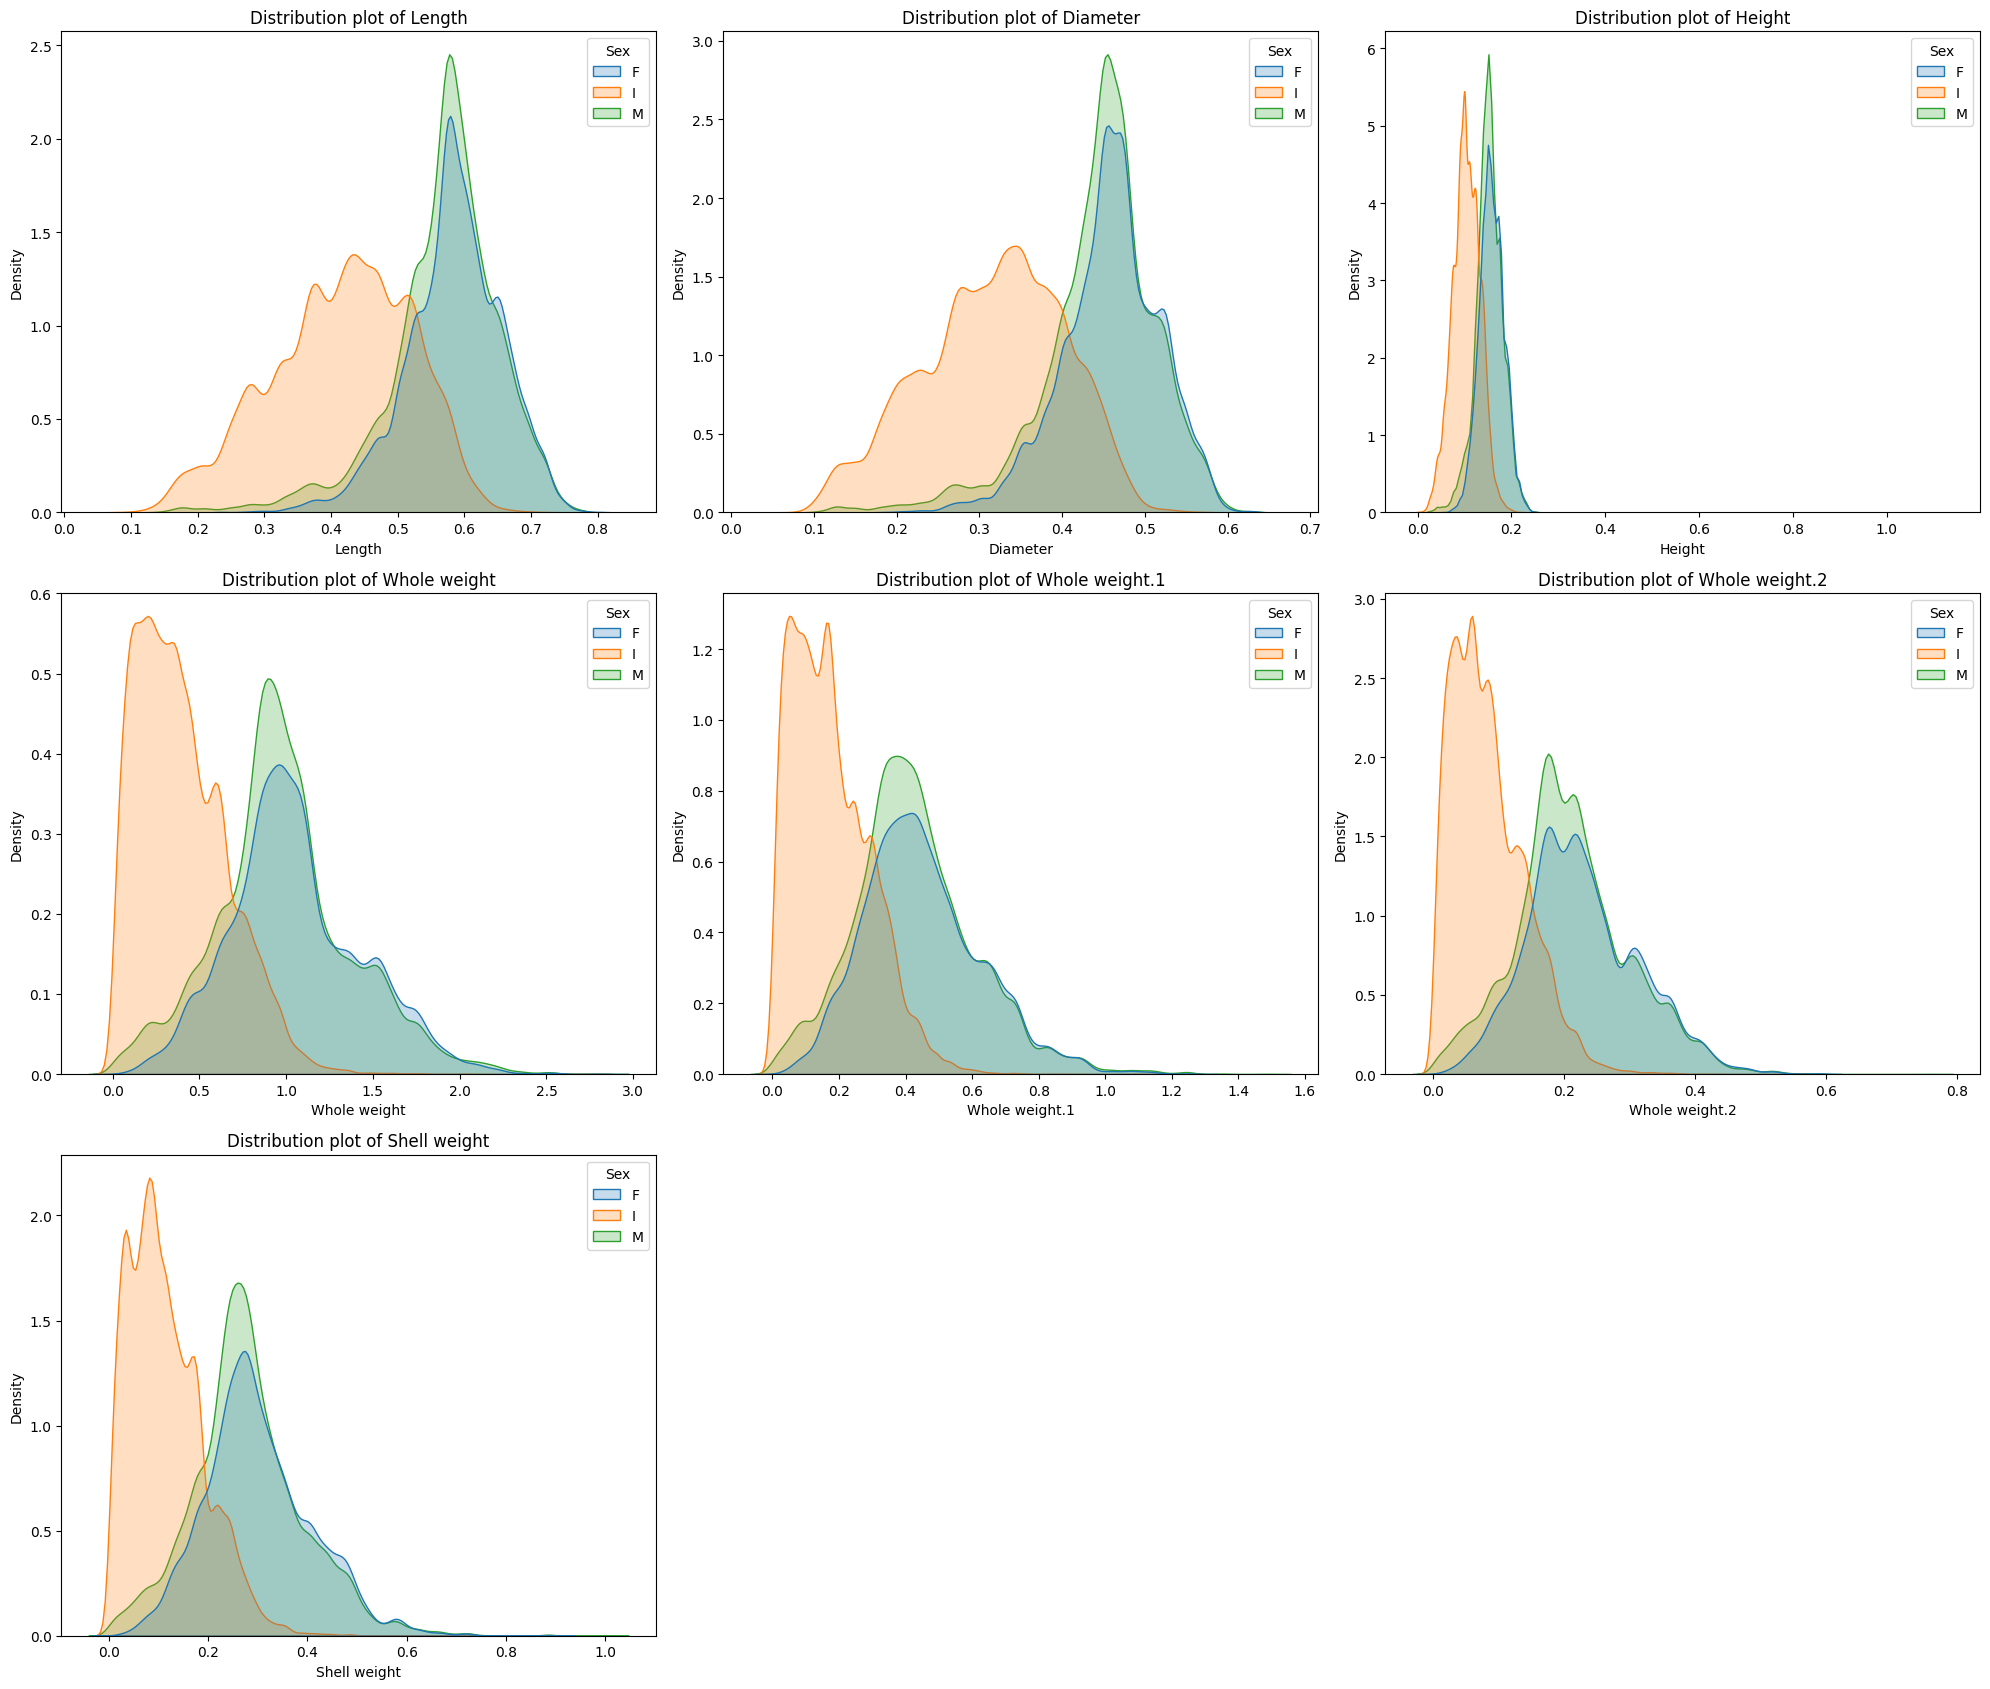

In [11]:
plt.figure(
    figsize=(20,17)
)
for i,cols in enumerate(num_cols):
    plt.subplot(3,3,(i+1))
    sns.kdeplot(
        data = train_df,
        x = cols,
        fill=True,
        hue='Sex'
    )
    plt.title(f'Distribution plot of {cols}')
plt.tight_layout()
plt.show()

# Feature Engineering

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
train_df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')

In [14]:
num_cols = train_df.dtypes[train_df.dtypes==float].keys().tolist()

In [15]:
corr = train_df[num_cols].corr()
corr

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
Length,1.000000,0.989732,0.916094,0.931449,0.909609,0.913134,0.911073
Diameter,0.989732,1.000000,0.919618,0.933848,0.908466,0.914668,0.917871
Height,0.916094,0.919618,1.000000,0.902344,0.861769,0.886132,0.904019
Whole weight,0.931449,0.933848,0.902344,1.000000,0.971249,0.974319,0.964201
Whole weight.1,0.909609,0.908466,0.861769,0.971249,1.000000,0.949227,0.911800
Whole weight.2,0.913134,0.914668,0.886132,0.974319,0.949227,1.000000,0.937069
Shell weight,0.911073,0.917871,0.904019,0.964201,0.911800,0.937069,1.000000


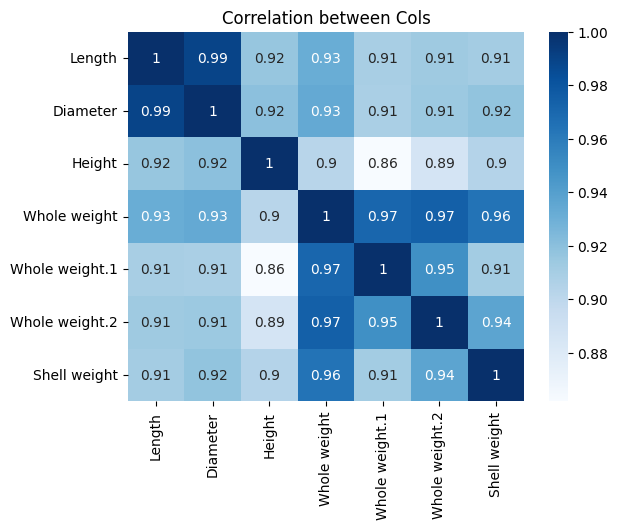

In [16]:
plt.title('Correlation between Cols')
sns.heatmap(corr,annot=True,cmap='Blues')
plt.show()

# Data Preprocessing

In [17]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [18]:
train_df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [19]:
x = train_df.drop('Rings',axis=1)
y = train_df['Rings']

In [20]:
x.drop(
    columns='id',
    axis=1,
    inplace=True
)

In [21]:
x.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975


In [22]:
col_trans = ColumnTransformer([
    ('Scaling',MinMaxScaler(),[1,2,3,4,5,6,7]),
    ('Encoding',OneHotEncoder(),[0])
],remainder='passthrough')
col_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('Scaling', MinMaxScaler(),
                                 [1, 2, 3, 4, 5, 6, 7]),
                                ('Encoding', OneHotEncoder(), [0])])

In [23]:
trans_data = col_trans.fit_transform(x)
trans_data[0]

array([0.64189189, 0.6302521 , 0.13274336, 0.27253409, 0.2202421 ,
       0.19223173, 0.23766816, 1.        , 0.        , 0.        ])

# Data Modelig and Prediction

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test = train_test_split(
    trans_data,
    y,
    test_size=0.2)

In [26]:
x_train.shape,x_test.shape

((72492, 10), (18123, 10))

# Install Lazy Predictor

In [34]:
#!pip install lazypredict

#### You can use Lazy predictor but It is little bit computational algo

In [35]:
#from lazypredict.Supervised import LazyClassifier

In [ ]:
# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# models,predictions = clf.fit(x_train, x_test, y_train, y_test)

 10%|█         | 3/29 [00:10<01:15,  2.90s/it]

# Custom Models

In [27]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

In [28]:
def train_regression_models(x_train, y_train):
    models = {
        'RandomForest': RandomForestRegressor(),
        'GradientBoosting': GradientBoostingRegressor(),
        'LinearRegression': LinearRegression(),
        'KNeighbors': KNeighborsRegressor(),
        'DecisionTree': DecisionTreeRegressor(),
        'NeuralNetwork': MLPRegressor()
    }

    trained_models = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        trained_models[name] = model
    return trained_models


In [29]:
trained_models = train_regression_models(x_train,y_train)

In [30]:
trained_models

{'RandomForest': RandomForestRegressor(),
 'GradientBoosting': GradientBoostingRegressor(),
 'LinearRegression': LinearRegression(),
 'KNeighbors': KNeighborsRegressor(),
 'DecisionTree': DecisionTreeRegressor(),
 'NeuralNetwork': MLPRegressor()}

In [43]:
import pandas as pd
from sklearn.metrics import mean_squared_error

model_names = []
mse_scores = []
model_score = []

for model_name, model in trained_models.items():
    y_pred = model.predict(x_test)
    score = model.score(x_test,y_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    model_names.append(model_name)
    model_score.append(score)

mse_df = pd.DataFrame({
    'Model_Name': model_names,
    'MSE': mse_scores,
    'Score':model_score
})


In [44]:
mse_df

,Model_Name,MSE,Score
0,RandomForest,3.470404,0.652454
1,GradientBoosting,3.487810,0.650711
2,LinearRegression,3.860590,0.613378
3,KNeighbors,4.007129,0.598703
4,DecisionTree,6.841583,0.314845
5,NeuralNetwork,3.478005,0.651693


# For TestSet

In [46]:
test_id = test_df['id']

In [47]:
test_df.drop('id',axis=1,inplace=True)

In [48]:
test_df.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [52]:
# use the Column Transformer

test_set = col_trans.fit_transform(test_df)
test_set[0]

array([0.7862069 , 0.70588235, 0.14155251, 0.43775456, 0.41526564,
       0.48673947, 0.29825436, 0.        , 0.        , 1.        ])

In [54]:
pred = trained_models['RandomForest'].predict(test_set)

In [56]:
submission = pd.DataFrame({
    'id':test_id,
    'Rings':pred
})

In [57]:
submission

,id,Rings
0,90615,10.50
1,90616,9.82
2,90617,10.38
3,90618,12.11
4,90619,8.33
...,...,...
60406,151021,6.47
60407,151022,9.04
60408,151023,12.37
60409,151024,14.32


In [58]:
submission.to_csv('submission.csv', index=False)